In [20]:
#Importing necessary libraries

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model

In [21]:
#Generating Dataset : creating 50*50 numpy array with zeros and randomly assigning a value of 255 to single coordinate in the image 
#We are randomly generating the coordinate of 255 pixel value and returning images and respected target coordinates 

def generate_dataset(num_samples):
    images = []
    targets = []
    
    for _ in range(num_samples): 
        x = np.random.randint(0, 50)
        y = np.random.randint(0, 50)
        
        image = np.zeros((50, 50))
        image[x, y] = 255
        
        images.append(image)
        targets.append([x, y])
    return np.array(images), np.array(targets) 

In [40]:
# Defining our custom CNN model

def create_model():
    inputs = layers.Input(shape=(50, 50, 1))
    x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(2)(x) 
    model = Model(inputs, outputs)
    return model

In [23]:
num_samples = 10000
images, targets = generate_dataset(num_samples)

In [24]:
images = images.reshape(-1, 50, 50, 1) / 255.0

In [25]:
train_images, test_images = images[:8000], images[8000:]
train_targets, test_targets = targets[:8000], targets[8000:]

In [26]:
model = create_model()
model.compile(optimizer='adam', loss='mse')

In [33]:
history = model.fit(train_images, train_targets, epochs=35, batch_size=32, validation_data=(test_images, test_targets))

Epoch 1/35
250/250 [==============================] - 25s 101ms/step - loss: 0.1457 - val_loss: 0.1406
Epoch 2/35
250/250 [==============================] - 25s 99ms/step - loss: 0.0782 - val_loss: 0.0495
Epoch 3/35
250/250 [==============================] - 25s 98ms/step - loss: 0.0920 - val_loss: 0.2837
Epoch 4/35
250/250 [==============================] - 25s 99ms/step - loss: 0.1019 - val_loss: 0.0697
Epoch 5/35
250/250 [==============================] - 25s 100ms/step - loss: 0.0663 - val_loss: 0.0697
Epoch 6/35
250/250 [==============================] - 25s 99ms/step - loss: 0.1727 - val_loss: 0.1772
Epoch 7/35
250/250 [==============================] - 25s 100ms/step - loss: 0.0765 - val_loss: 0.0578
Epoch 8/35
250/250 [==============================] - 25s 101ms/step - loss: 0.0597 - val_loss: 0.0750
Epoch 9/35
250/250 [==============================] - 28s 110ms/step - loss: 0.1321 - val_loss: 0.1764
Epoch 10/35
250/250 [==============================] - 25s 99ms/step - loss: 

In [34]:
new_image = np.zeros((50, 50))
new_image[10, 20] = 255  
new_image = new_image.reshape(1, 50, 50, 1) / 255.0  
predicted_coordinates = model.predict(new_image)
print("Predicted coordinates:", predicted_coordinates)

1/1 [==============================] - 0s 40ms/step
Predicted coordinates: [[10.362829 20.719961]]


In [35]:
rounded_coordinates = np.round(predicted_coordinates)

In [36]:
print("Predicted coordinates:", rounded_coordinates)

Predicted coordinates: [[10. 21.]]


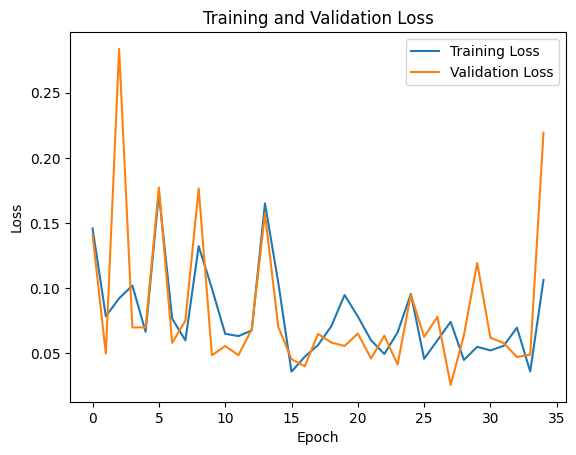

In [37]:
#Training and Validation loss graph

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

63/63 [==============================] - 2s 24ms/step


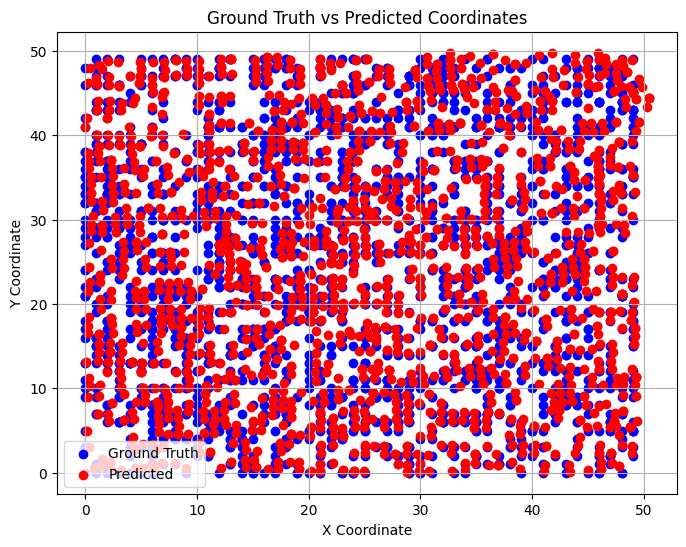

In [39]:
#Ground Trurh Vs Predicted Coordinates Scattered plot

test_predictions = model.predict(test_images)

plt.figure(figsize=(8, 6))
plt.scatter(test_targets[:, 0], test_targets[:, 1], color='blue', label='Ground Truth')
plt.scatter(test_predictions[:, 0], test_predictions[:, 1], color='red', label='Predicted')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Ground Truth vs Predicted Coordinates')
plt.legend()
plt.grid(True)
plt.show()